In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

## PubMedQA

In [2]:
res_CoR = pd.read_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/CoR_combined_results.csv')
res_CoR['engine'] = "CoR"
print(res_CoR.head())

res_null = pd.read_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/null_combined_results.csv')
res_null['engine'] = "null"
print(res_null.head())

res = pd.concat([res_CoR, res_null], axis=0, ignore_index=True)
print(f"The dimension of this data frame is: {res.shape}")

                                            question      answer  \
0  You will be provided with a question and a set...    yes(0.9)   
1  You will be provided with a question and a set...  yes(0.900)   
2  You will be provided with a question and a set...       maybe   
3  You will be provided with a question and a set...         yes   
4  You will be provided with a question and a set...         yes   

                                           reasoning  confidence  time_taken  \
0                                                NaN         0.9       2.113   
1  Okay, so the question is asking whether high c...         0.9      40.812   
2  The contexts suggest a significant relationshi...         0.7       2.741   
3  The study found a positive and significant rel...         0.8       6.605   
4  The contexts show a positive and significant r...         0.9       4.430   

  error                                    model        id engine  
0   NaN                            deepsee

In [3]:
res.to_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results.csv")

In [4]:
res['final_res'] = res['answer'].str.lower().str.extract(r'(yes|no|maybe)\(0?\.\d+\)', expand=False)

# Fill missing values by extracting standalone numbers (1-4)
res['final_res'] = res['final_res'].fillna(
    res['answer'].str.extract(r'\b(yes|no|maybe)\b', expand=False)
)
res.head(10)

,question,answer,reasoning,confidence,time_taken,error,model,id,engine,final_res
0,You will be provided with a question and a set...,yes(0.9),NaN,0.90,2.113,NaN,deepseek-chat,15939071,CoR,yes
1,You will be provided with a question and a set...,yes(0.900),"Okay, so the question is asking whether high c...",0.90,40.812,NaN,deepseek-reasoner,15939071,CoR,yes
2,You will be provided with a question and a set...,maybe,The contexts suggest a significant relationshi...,0.70,2.741,NaN,gpt-4o,15939071,CoR,maybe
3,You will be provided with a question and a set...,yes,The study found a positive and significant rel...,0.80,6.605,NaN,meta-llama/Meta-Llama-3.1-405B-Instruct,15939071,CoR,yes
4,You will be provided with a question and a set...,yes,The contexts show a positive and significant r...,0.90,4.430,NaN,Qwen/Qwen2.5-72B-Instruct,15939071,CoR,yes
5,You will be provided with a question and a set...,The study demonstrates that high cumulative in...,NaN,1.00,8.440,NaN,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,15939071,CoR,yes
6,You will be provided with a question and a set...,The study shows that higher cumulative insulin...,NaN,1.00,6.922,NaN,deepseek-ai/DeepSeek-R1-Distill-Llama-8B,15939071,CoR,yes
7,You will be provided with a question and a set...,yes(0.85),NaN,0.85,1.656,NaN,deepseek-chat,10158597,CoR,yes
8,You will be provided with a question and a set...,yes(0.85),"Okay, let me try to work through this problem ...",0.85,55.115,NaN,deepseek-reasoner,10158597,CoR,yes
9,You will be provided with a question and a set...,yes,The introduction of a discharge coordinator im...,0.85,2.763,NaN,gpt-4o,10158597,CoR,yes


In [5]:
# Define the path to your JSON file
file_path = "/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/ori_pqal.json"

# Load the JSON file
with open(file_path, "r") as f:
    data = json.load(f)

# Convert JSON to a structured list for DataFrame
rows = []
for pmid, details in data.items():
    row = {
        "PMID": pmid,
        "QUESTION": details.get("QUESTION", ""),
        "CONTEXTS": " ||| ".join(details.get("CONTEXTS", [])),  # Join context paragraphs
        "LABELS": " ||| ".join(details.get("LABELS", [])),  # Join labels
        "MESHES": " ||| ".join(details.get("MESHES", [])),  # Join MeSH terms
        "YEAR": details.get("YEAR", ""),
        "reasoning_required_pred": details.get("reasoning_required_pred", ""),
        "reasoning_free_pred": details.get("reasoning_free_pred", ""),
        "final_decision": details.get("final_decision", ""),
        "LONG_ANSWER": details.get("LONG_ANSWER", ""),
    }
    rows.append(row)

    # Convert list to DataFrame
    df = pd.DataFrame(rows)
    df['id'] = df['PMID']

In [6]:
res['id'] = res['id'].astype(str) 
df['id'] = df['id'].astype(str)
res = res.merge(df[['id', 'final_decision', 'LONG_ANSWER']], on='id', how='left')
print(res.head())

                                            question      answer  \
0  You will be provided with a question and a set...    yes(0.9)   
1  You will be provided with a question and a set...  yes(0.900)   
2  You will be provided with a question and a set...       maybe   
3  You will be provided with a question and a set...         yes   
4  You will be provided with a question and a set...         yes   

                                           reasoning  confidence  time_taken  \
0                                                NaN         0.9       2.113   
1  Okay, so the question is asking whether high c...         0.9      40.812   
2  The contexts suggest a significant relationshi...         0.7       2.741   
3  The study found a positive and significant rel...         0.8       6.605   
4  The contexts show a positive and significant r...         0.9       4.430   

  error                                    model        id engine final_res  \
0   NaN                        

In [7]:
res['model'] = res['model'].replace({
    'Qwen/Qwen2.5-72B-Instruct': 'Qwen2.5-72B',  
    'deepseek-ai/DeepSeek-R1-Distill-Llama-8B': 'Distill-Llama-8B',
    'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B': 'Distill-Qwen-7B',  
    'deepseek-chat': 'DeepSeek-V3',
    'deepseek-reasoner': 'DeepSeek-R1',  
    'meta-llama/Meta-Llama-3.1-405B-Instruct': 'Llama-3.1-405B',
    'gpt-4o': 'GPT-4o'
})

In [8]:
## filter Na file
res = res[res['final_res'].notna()]
res['group'] = np.random.randint(1, 11, size=len(res))

# -------------------------------------------
# 1) Calculate accuracy for each subject and model
# -------------------------------------------
# Create a boolean column that is True if the predicted option matches the ground truth.
# Note: Comparing NaN with any value returns False, so missing predictions are counted as incorrect.
res['correct'] = res['final_res'] == res['final_decision']

# Group by subject_name and model and compute the accuracy (i.e. the mean of the boolean 'correct' column)
acc_df = res.groupby(['group', 'model', 'engine'], as_index=False)['correct'].mean()
acc_df.rename(columns={'correct': 'accuracy'}, inplace=True)
#print("Accuracy per subject and model:")
#print(acc_df)

In [9]:
print(acc_df)

     group             model engine  accuracy
0        1       DeepSeek-R1    CoR  0.763441
1        1       DeepSeek-R1   null  0.716216
2        1       DeepSeek-V3    CoR  0.588235
3        1       DeepSeek-V3   null  0.566265
4        1  Distill-Llama-8B    CoR  0.616438
..     ...               ...    ...       ...
135     10            GPT-4o   null  0.636364
136     10    Llama-3.1-405B    CoR  0.789474
137     10    Llama-3.1-405B   null  0.656716
138     10       Qwen2.5-72B    CoR  0.685393
139     10       Qwen2.5-72B   null  0.500000

[140 rows x 4 columns]


In [11]:
acc_df = pd.read_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_evaluation.csv')
acc_df['engine'] = acc_df['engine'].fillna('null')

In [14]:
acc_df.groupby(['model'])['accuracy'].mean()

model
DeepSeek-R1         0.742676
DeepSeek-V3         0.559754
Distill-Llama-8B    0.542365
Distill-Qwen-7B     0.667708
GPT-4o              0.655764
Llama-3.1-405B      0.741996
Qwen2.5-72B         0.677715
Name: accuracy, dtype: float64

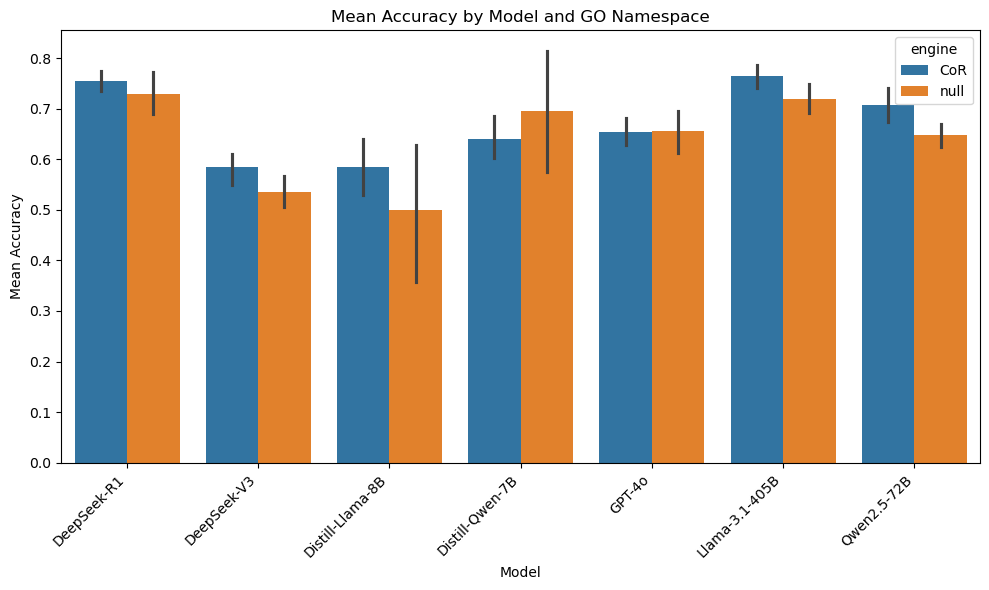

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=acc_df,
    x="model",
    y="accuracy",
    hue="engine",
    estimator=np.mean,
    errorbar=("ci", 95)  # This adds error bars representing 95% confidence intervals
)

plt.xlabel("Model")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy by Model and GO Namespace")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:
grouped = acc_df.groupby(['model', 'engine'])['accuracy'].mean().reset_index()
grouped.rename(columns={'accuracy': 'accuracy_mean'}, inplace=True)
grouped_var = acc_df.groupby(['model', 'engine'])['accuracy'].var().reset_index()
grouped = grouped.merge(grouped_var)
grouped.rename(columns={'accuracy': 'accuracy_var'}, inplace=True)
print(grouped)

               model engine  accuracy_mean  accuracy_var
0        DeepSeek-R1    CoR       0.755765      0.000960
1        DeepSeek-R1   null       0.729587      0.005297
2        DeepSeek-V3    CoR       0.583886      0.002932
3        DeepSeek-V3   null       0.535622      0.002998
4   Distill-Llama-8B    CoR       0.584969      0.009389
5   Distill-Llama-8B   null       0.499762      0.052841
6    Distill-Qwen-7B    CoR       0.640772      0.005324
7    Distill-Qwen-7B   null       0.694643      0.039651
8             GPT-4o    CoR       0.654681      0.001872
9             GPT-4o   null       0.656848      0.004995
10    Llama-3.1-405B    CoR       0.765177      0.001401
11    Llama-3.1-405B   null       0.718815      0.002451
12       Qwen2.5-72B    CoR       0.708054      0.003593
13       Qwen2.5-72B   null       0.647376      0.001461


In [12]:
res.to_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_processed.csv')
acc_df.to_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_evaluation.csv')
acc_df.round(3).to_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/acc_df.csv')
grouped.round(3).to_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/grouped.csv')

In [3]:
res = pd.read_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_processed.csv')
acc_df = pd.read_csv('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_evaluation.csv')
res['engine'] = res['engine'].fillna('null')
acc_df['engine'] = acc_df['engine'].fillna('null')

## Time taken

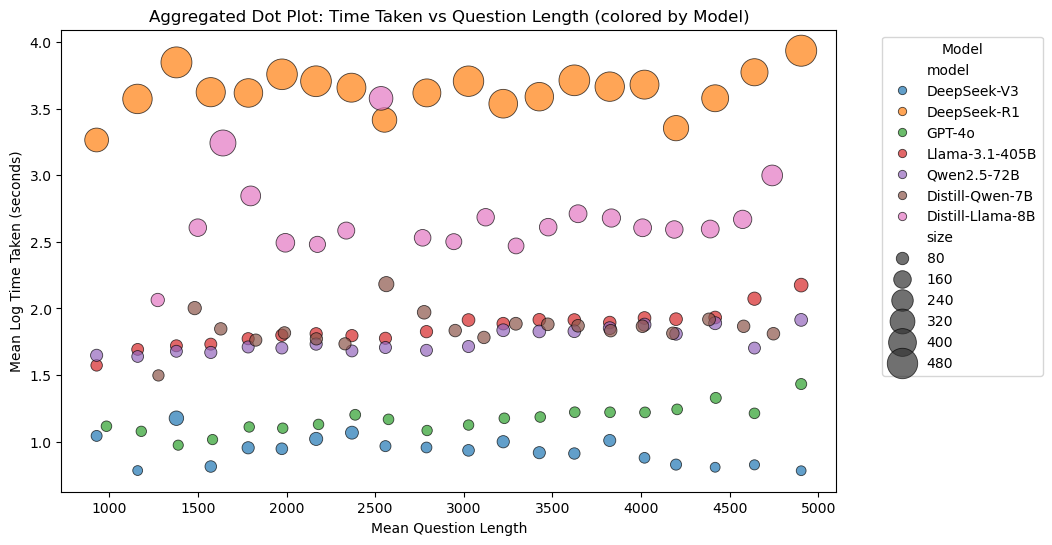

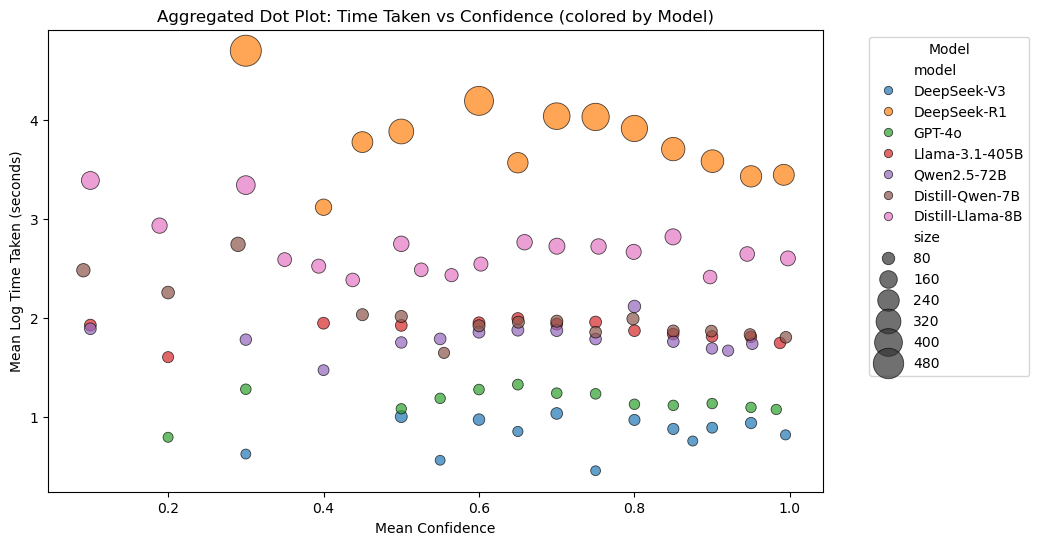

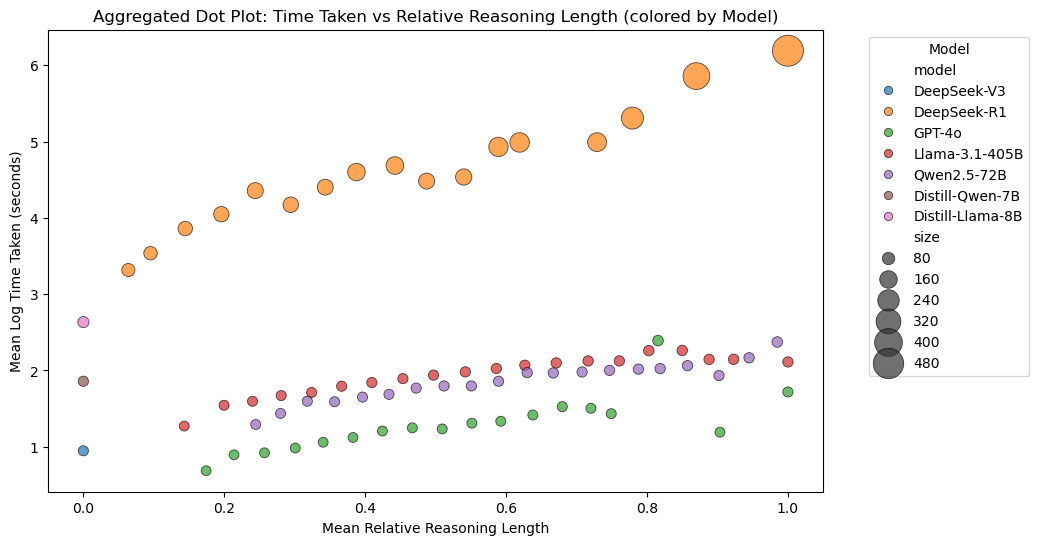

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume res is your DataFrame with these columns:
# 'model', 'time_taken', 'question_length', 'confidence', and 'reasoning'.
# And that you have computed:
res['log_time'] = np.log(res['time_taken'])
res['question_length'] = res['question'].apply(len)

# Compute relative reasoning length (if not already computed)
max_reasoning_lengths = res.groupby('model')['reasoning'].apply(
    lambda x: x.apply(lambda r: len(str(r)) if isinstance(r, str) else 0).max()
)
res['reasoning_length'] = res['reasoning'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
res['relative_reasoning_length'] = res.apply(
    lambda row: row['reasoning_length'] / max_reasoning_lengths[row['model']]
    if row['reasoning_length'] > 0 else 0,
    axis=1
)

# For confidence, we work with a filtered version (confidence values <= 1)
df_filtered_confidence = res[res['confidence'] <= 1].copy()

# ---- Aggregation Function ----
def aggregate_by_variable(df, var, bins=20):
    """
    For each model in df, split the data into `bins` groups based on the variable `var`.
    Returns a DataFrame with the aggregated means:
      - mean_time_taken: mean raw time (for dot size)
      - mean_log_time: mean log(time) (for y-axis)
      - mean_var: mean value of the chosen variable (for x-axis)
    Also returns the model label.
    """
    agg_list = []
    for model in df['model'].unique():
        sub = df[df['model'] == model].copy()
        # Bin the variable into 'bins' groups (using equal-width bins)
        sub[f'{var}_bin'] = pd.cut(sub[var], bins=bins, labels=False)
        grouped = sub.groupby(f'{var}_bin').agg(
            mean_time_taken=('time_taken', 'mean'),
            mean_log_time=('log_time', 'mean'),
            mean_var=(var, 'mean')
        ).reset_index()
        grouped['model'] = model
        # Ensure bin index is integer (optional)
        grouped[f'{var}_bin'] = grouped[f'{var}_bin'].astype(int)
        agg_list.append(grouped)
    agg_df = pd.concat(agg_list, ignore_index=True)
    # For plotting, let x be the aggregated mean of the chosen variable
    agg_df['x'] = agg_df['mean_var']
    return agg_df

# ---- Dot Size Scaling Function ----
def map_sizes(s, min_size=50, max_size=500):
    """Scale series s linearly to the range [min_size, max_size]."""
    s_norm = (s - s.min()) / (s.max() - s.min() + 1e-6)
    return s_norm * (max_size - min_size) + min_size

# ---- Plotting ----
# We use seaborn.scatterplot so that 'hue' (model) is handled as a categorical variable.
# Adjust size range and palette as needed. For categorical hue, a palette like 'tab10' works well.

scale_min = 50   # minimum marker size
scale_max = 500  # maximum marker size

##############################
# Plot 1: x axis is Question/Input Length, dot color indicates Model
##############################
agg_question = aggregate_by_variable(res, 'question_length', bins=20)
agg_question['size'] = map_sizes(agg_question['mean_time_taken'], scale_min, scale_max)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agg_question,
    x='x', y='mean_log_time',
    hue='model',
    size='size', sizes=(scale_min, scale_max),
    palette='tab10',
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel("Mean Question Length")
plt.ylabel("Mean Log Time Taken (seconds)")
plt.title("Aggregated Dot Plot: Time Taken vs Question Length (colored by Model)")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##############################
# Plot 2: x axis is Confidence, dot color indicates Model
##############################
agg_conf = aggregate_by_variable(df_filtered_confidence, 'confidence', bins=20)
agg_conf['size'] = map_sizes(agg_conf['mean_time_taken'], scale_min, scale_max)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agg_conf,
    x='x', y='mean_log_time',
    hue='model',
    size='size', sizes=(scale_min, scale_max),
    palette='tab10',
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel("Mean Confidence")
plt.ylabel("Mean Log Time Taken (seconds)")
plt.title("Aggregated Dot Plot: Time Taken vs Confidence (colored by Model)")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##############################
# Plot 3: x axis is Relative Reasoning Length, dot color indicates Model
##############################
agg_rrl = aggregate_by_variable(res, 'relative_reasoning_length', bins=20)
agg_rrl['size'] = map_sizes(agg_rrl['mean_time_taken'], scale_min, scale_max)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agg_rrl,
    x='x', y='mean_log_time',
    hue='model',
    size='size', sizes=(scale_min, scale_max),
    palette='tab10',
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel("Mean Relative Reasoning Length")
plt.ylabel("Mean Log Time Taken (seconds)")
plt.title("Aggregated Dot Plot: Time Taken vs Relative Reasoning Length (colored by Model)")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


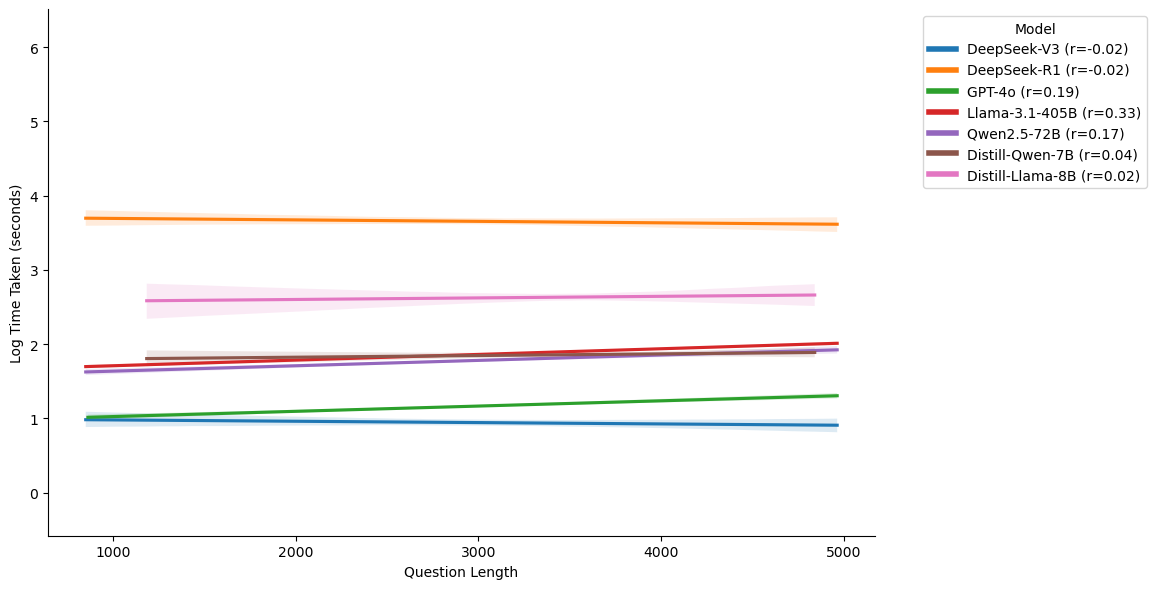

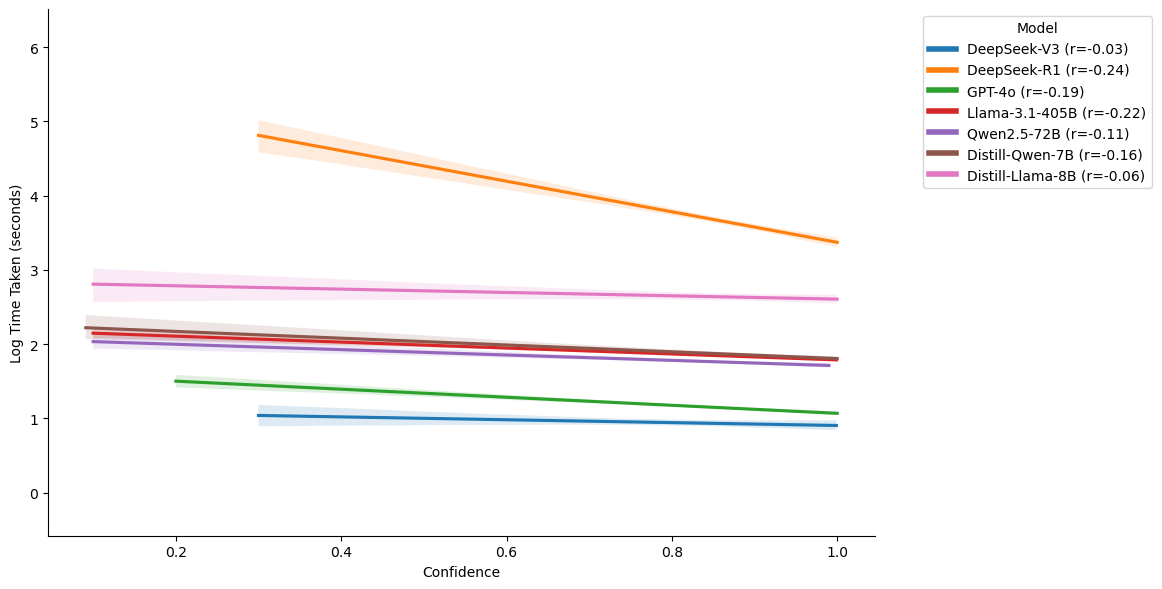

/opt/anaconda3/envs/llms/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/llms/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


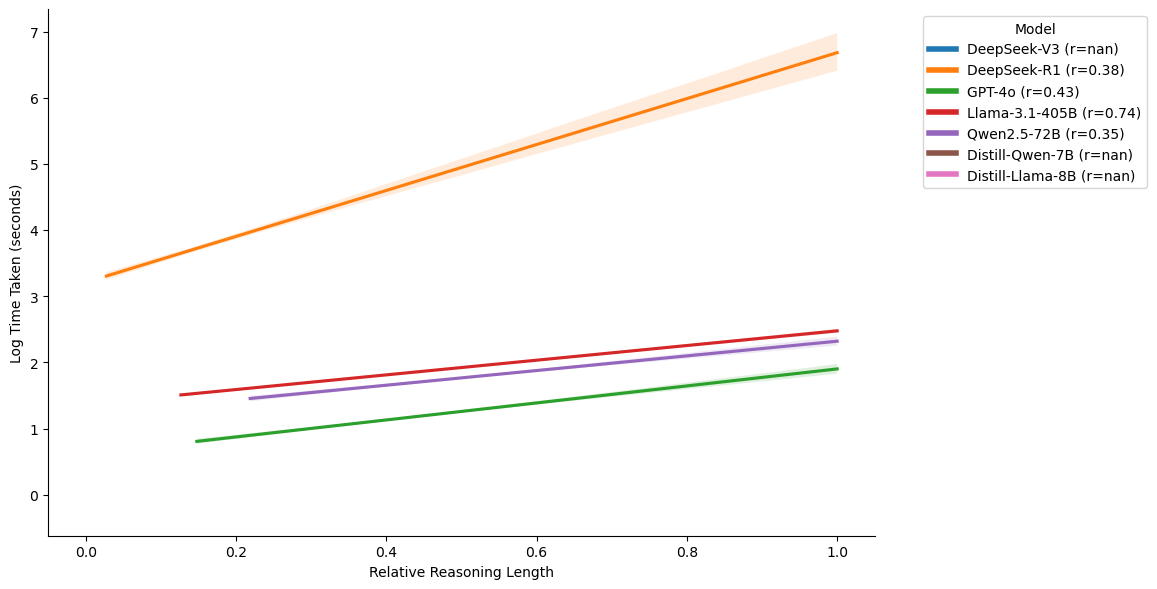

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

save_dir = "/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/"
os.makedirs(save_dir, exist_ok=True)

# --- Linear Fit with Confidence Interval (Straight Line) ---
# We use lmplot with default linear regression (no lowess) and hide scatter points.
g1 = sns.lmplot(
    data=res,
    x="question_length",
    y="log_time",
    hue="model",
    ci=95,                   # 95% confidence interval (error band)
    scatter_kws={'alpha': 0},# hide individual dots
    height=6, aspect=1.5,
    palette="tab10" # Ensuring consistent coloring
)
g1.set_axis_labels("Question Length", "Log Time Taken (seconds)")
g1._legend.remove()

# --- Adding Correlation to the Legend with Colors ---
ax1 = g1.ax
handles, labels = ax1.get_legend_handles_labels()
# Get colors from the plot
palette = sns.color_palette("tab10", n_colors=len(res['model'].unique()))
color_map = dict(zip(res['model'].unique(), palette))

new_labels = []
new_handles = []
for lab in labels:
    if lab in res['model'].unique():
        sub = res[res['model'] == lab]
        corr = sub['question_length'].corr(sub['log_time'])
        new_labels.append(f"{lab} (r={corr:.2f})")
        new_handles.append(plt.Line2D([0], [0], color=color_map[lab], lw=4))
    else:
        new_labels.append(lab)
        new_handles.append(plt.Line2D([0], [0], color="black", lw=4))

ax1.legend(handles=new_handles, labels=new_labels, title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
g1.savefig(os.path.join(save_dir, "question_length_vs_log_time.pdf"))
plt.show()

# --- Filter Data for Confidence Plot ---
df_filtered_confidence = res[res['confidence'] <= 1].copy()

# --- Linear Fit with Confidence Interval (Straight Line) ---
g2 = sns.lmplot(
    data=df_filtered_confidence,
    x="confidence",
    y="log_time",
    hue="model",
    ci=95,
    scatter_kws={'alpha': 0},
    height=6, aspect=1.5,
    palette="tab10" # Ensuring consistent coloring
)
g2.set_axis_labels("Confidence", "Log Time Taken (seconds)")
g2._legend.remove()

# --- Adding Correlation to the Legend ---
ax2 = g2.ax
handles, labels = ax2.get_legend_handles_labels()
# Get colors from the plot
palette = sns.color_palette("tab10", n_colors=len(res['model'].unique()))
color_map = dict(zip(res['model'].unique(), palette))

new_labels = []
new_handles = []
for lab in labels:
    if lab in df_filtered_confidence['model'].unique():
        sub = df_filtered_confidence[df_filtered_confidence['model'] == lab]
        corr = sub['confidence'].corr(sub['log_time'])
        new_labels.append(f"{lab} (r={corr:.2f})")
        new_handles.append(plt.Line2D([0], [0], color=color_map[lab], lw=4))
    else:
        new_labels.append(lab)
        new_handles.append(plt.Line2D([0], [0], color="black", lw=4))

ax2.legend(handles=new_handles, labels=new_labels, title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
g2.savefig(os.path.join(save_dir, "confidence_vs_log_time.pdf"))
plt.show()

# --- Linear Fit with Confidence Interval (Straight Line) ---
g3 = sns.lmplot(
    data=res,
    x="relative_reasoning_length",
    y="log_time",
    hue="model",
    ci=95,
    scatter_kws={'alpha': 0},
    height=6, aspect=1.5,
    palette="tab10" # Ensuring consistent coloring
)
g3.set_axis_labels("Relative Reasoning Length", "Log Time Taken (seconds)")
g3._legend.remove()

# --- Adding Correlation to the Legend ---
ax3 = g3.ax
handles, labels = ax3.get_legend_handles_labels()

new_labels = []
new_handles = []
for lab in labels:
    if lab in res['model'].unique():
        sub = res[res['model'] == lab]
        corr = sub['relative_reasoning_length'].corr(sub['log_time'])
        new_labels.append(f"{lab} (r={corr:.2f})")
        new_handles.append(plt.Line2D([0], [0], color=color_map[lab], lw=4))
    else:
        new_labels.append(lab)
        new_handles.append(plt.Line2D([0], [0], color="black", lw=4))

ax3.legend(handles=new_handles, labels=new_labels, title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
g3.savefig(os.path.join(save_dir, "relative_reasoning_length_vs_log_time.pdf"))
plt.show()


### Agreement between different models

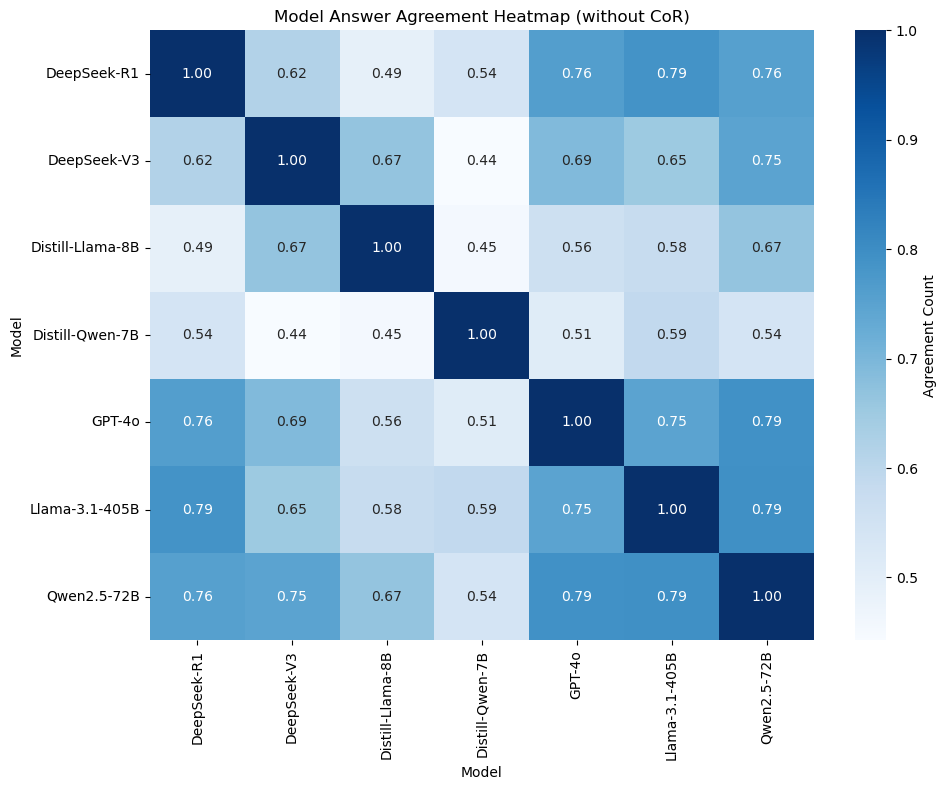

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 预处理数据（假设数据框名为res）
# 筛选有效记录并创建透视表
res_null = res[res['engine'] != 'CoR']
df_pivot = res_null.dropna(subset=['final_res']).pivot(
    index='id', 
    columns='model',
    values='final_res'
)

# 2. 计算模型间一致次数
models = df_pivot.columns.tolist()
agreement_matrix_null = pd.DataFrame(index=models, columns=models, dtype=int).fillna(0)

for i in range(len(models)):
    for j in range(i, len(models)):
        valid_data = df_pivot[[models[i], models[j]]].dropna()
        count = (valid_data.iloc[:,0] == valid_data.iloc[:,1]).sum()
        total = len(valid_data.iloc[:,0])
        prop = count / total
        # 显式转换为整数类型
        agreement_matrix_null.iloc[i, j] = prop
        agreement_matrix_null.iloc[j, i] = prop  # 保持对称性

# 3. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    agreement_matrix_null, 
    annot=True, 
    fmt=".2f",
    cmap='Blues', 
    mask=agreement_matrix_null.isnull(),
    cbar_kws={'label': 'Agreement Count'}
)
plt.title('Model Answer Agreement Heatmap (without CoR)')
plt.xlabel('Model')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/model_agreement_heatmap.pdf')
plt.show()

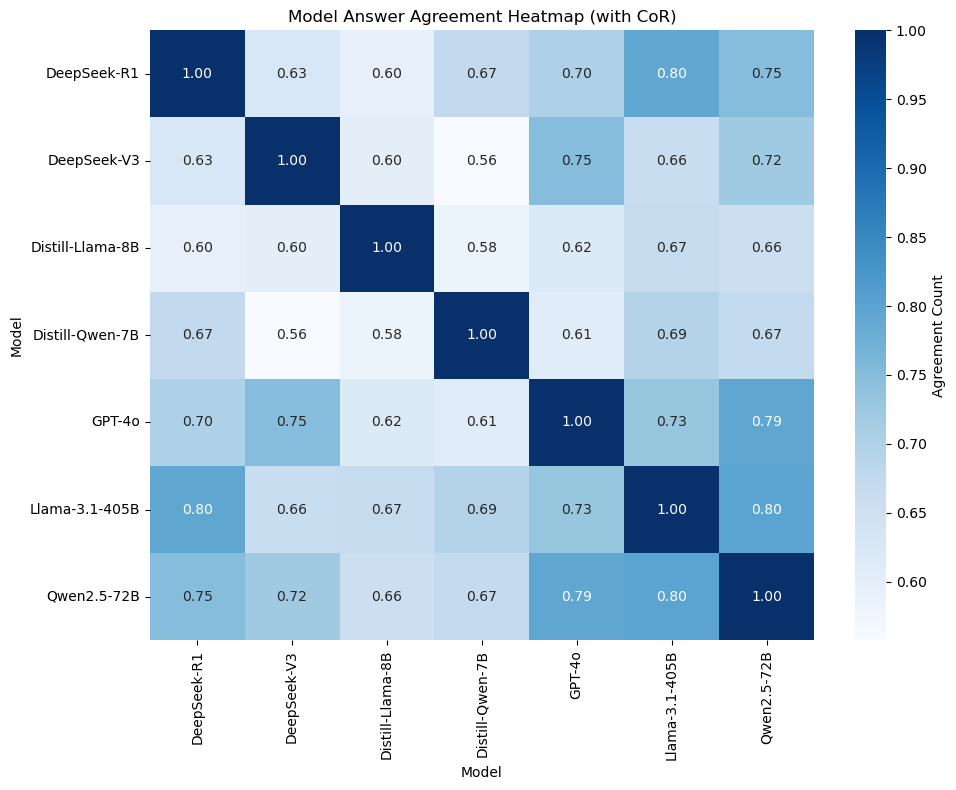

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 预处理数据（假设数据框名为res）
# 筛选有效记录并创建透视表
res_CoR = res[res['engine'] == 'CoR']
df_pivot = res_CoR.dropna(subset=['final_res']).pivot(
    index='id', 
    columns='model',
    values='final_res'
)

# 2. 计算模型间一致次数
models = df_pivot.columns.tolist()
agreement_matrix_CoR = pd.DataFrame(index=models, columns=models, dtype=int).fillna(0)

for i in range(len(models)):
    for j in range(i, len(models)):
        valid_data = df_pivot[[models[i], models[j]]].dropna()
        count = (valid_data.iloc[:,0] == valid_data.iloc[:,1]).sum()
        total = len(valid_data.iloc[:,0])
        prop = count / total
        # 显式转换为整数类型
        agreement_matrix_CoR.iloc[i, j] = prop
        agreement_matrix_CoR.iloc[j, i] = prop  # 保持对称性

# 3. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    agreement_matrix_CoR, 
    annot=True, 
    fmt=".2f",
    cmap='Blues', 
    mask=agreement_matrix_CoR.isnull(),
    cbar_kws={'label': 'Agreement Count'}
)
plt.title('Model Answer Agreement Heatmap (with CoR)')
plt.xlabel('Model')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

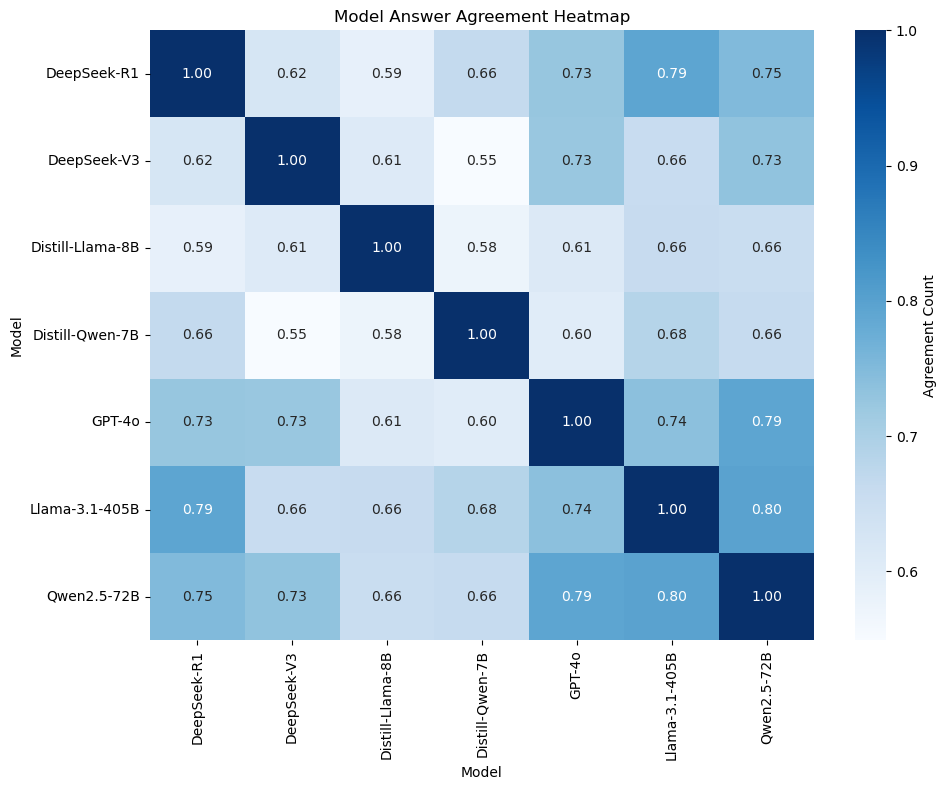

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 预处理数据（假设数据框名为res）
# 筛选有效记录并创建透视表
# convert res['engine'] to null if NaN
res['engine'] = res['engine'].fillna('null')
res['id_engine'] = res['id'].astype(str) + '_' + res['engine']
df_pivot = res.dropna(subset=['final_res']).pivot(
    index='id_engine', 
    columns='model',
    values='final_res'
)

# 2. 计算模型间一致次数
models = df_pivot.columns.tolist()
agreement_matrix = pd.DataFrame(index=models, columns=models, dtype=int).fillna(0)

for i in range(len(models)):
    for j in range(i, len(models)):
        valid_data = df_pivot[[models[i], models[j]]].dropna()
        count = (valid_data.iloc[:,0] == valid_data.iloc[:,1]).sum()
        total = len(valid_data.iloc[:,0])
        prop = count / total
        # 显式转换为整数类型
        agreement_matrix.iloc[i, j] = prop
        agreement_matrix.iloc[j, i] = prop  # 保持对称性

# 3. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    agreement_matrix, 
    annot=True, 
    fmt=".2f",
    cmap='Blues', 
    mask=agreement_matrix.isnull(),
    cbar_kws={'label': 'Agreement Count'}
)
plt.title('Model Answer Agreement Heatmap')
plt.xlabel('Model')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

### Difference confidence group

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use pd.qcut to create three groups with equal number of rows based on 'confidence'
res['confidence_level'] = pd.qcut(res['confidence'], q=3, labels=['low', 'medium', 'high'])

# Compute the accuracy for each model within the three confidence levels
accuracy_df = res.groupby(['model', 'confidence_level'])['correct'].mean().reset_index()


/var/folders/mv/5359mrfx7yq8dl6fs3p4gy000000gn/T/ipykernel_66407/3002450083.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_df = res.groupby(['model', 'confidence_level'])['correct'].mean().reset_index()


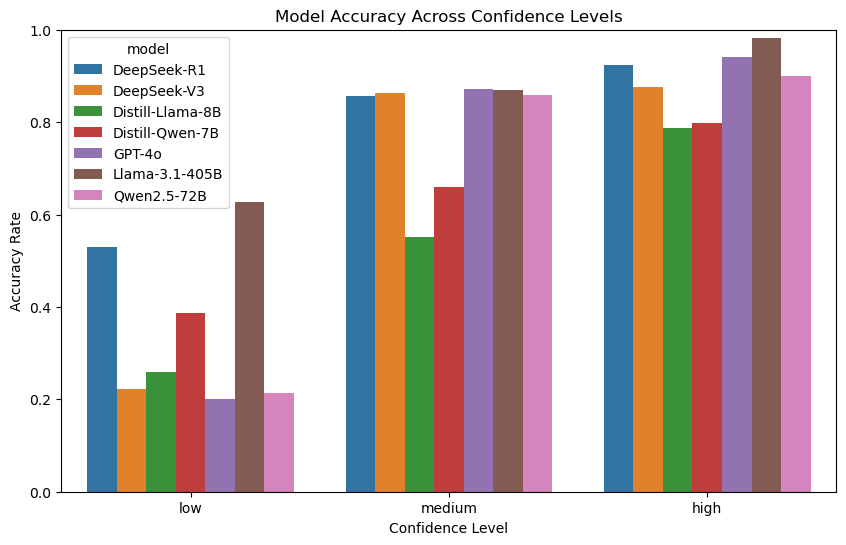

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='confidence_level', 
           y='correct',
           hue='model',
           data=accuracy_df)

plt.title('Model Accuracy Across Confidence Levels')
plt.ylabel('Accuracy Rate')
plt.xlabel('Confidence Level')
plt.ylim(0, 1)
plt.show()

## Final Plots

In [11]:
acc_df

,Unnamed: 0,group,model,engine,accuracy
0,0,1,DeepSeek-R1,CoR,0.770833
1,1,1,DeepSeek-R1,null,0.826087
2,2,1,DeepSeek-V3,CoR,0.644231
3,3,1,DeepSeek-V3,null,0.518987
4,4,1,Distill-Llama-8B,CoR,0.750000
...,...,...,...,...,...
135,135,10,GPT-4o,null,0.558824
136,136,10,Llama-3.1-405B,CoR,0.789474
137,137,10,Llama-3.1-405B,null,0.704918
138,138,10,Qwen2.5-72B,CoR,0.760870


/var/folders/mv/5359mrfx7yq8dl6fs3p4gy000000gn/T/ipykernel_66407/1109204446.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/opt/anaconda3/envs/llms/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/llms/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


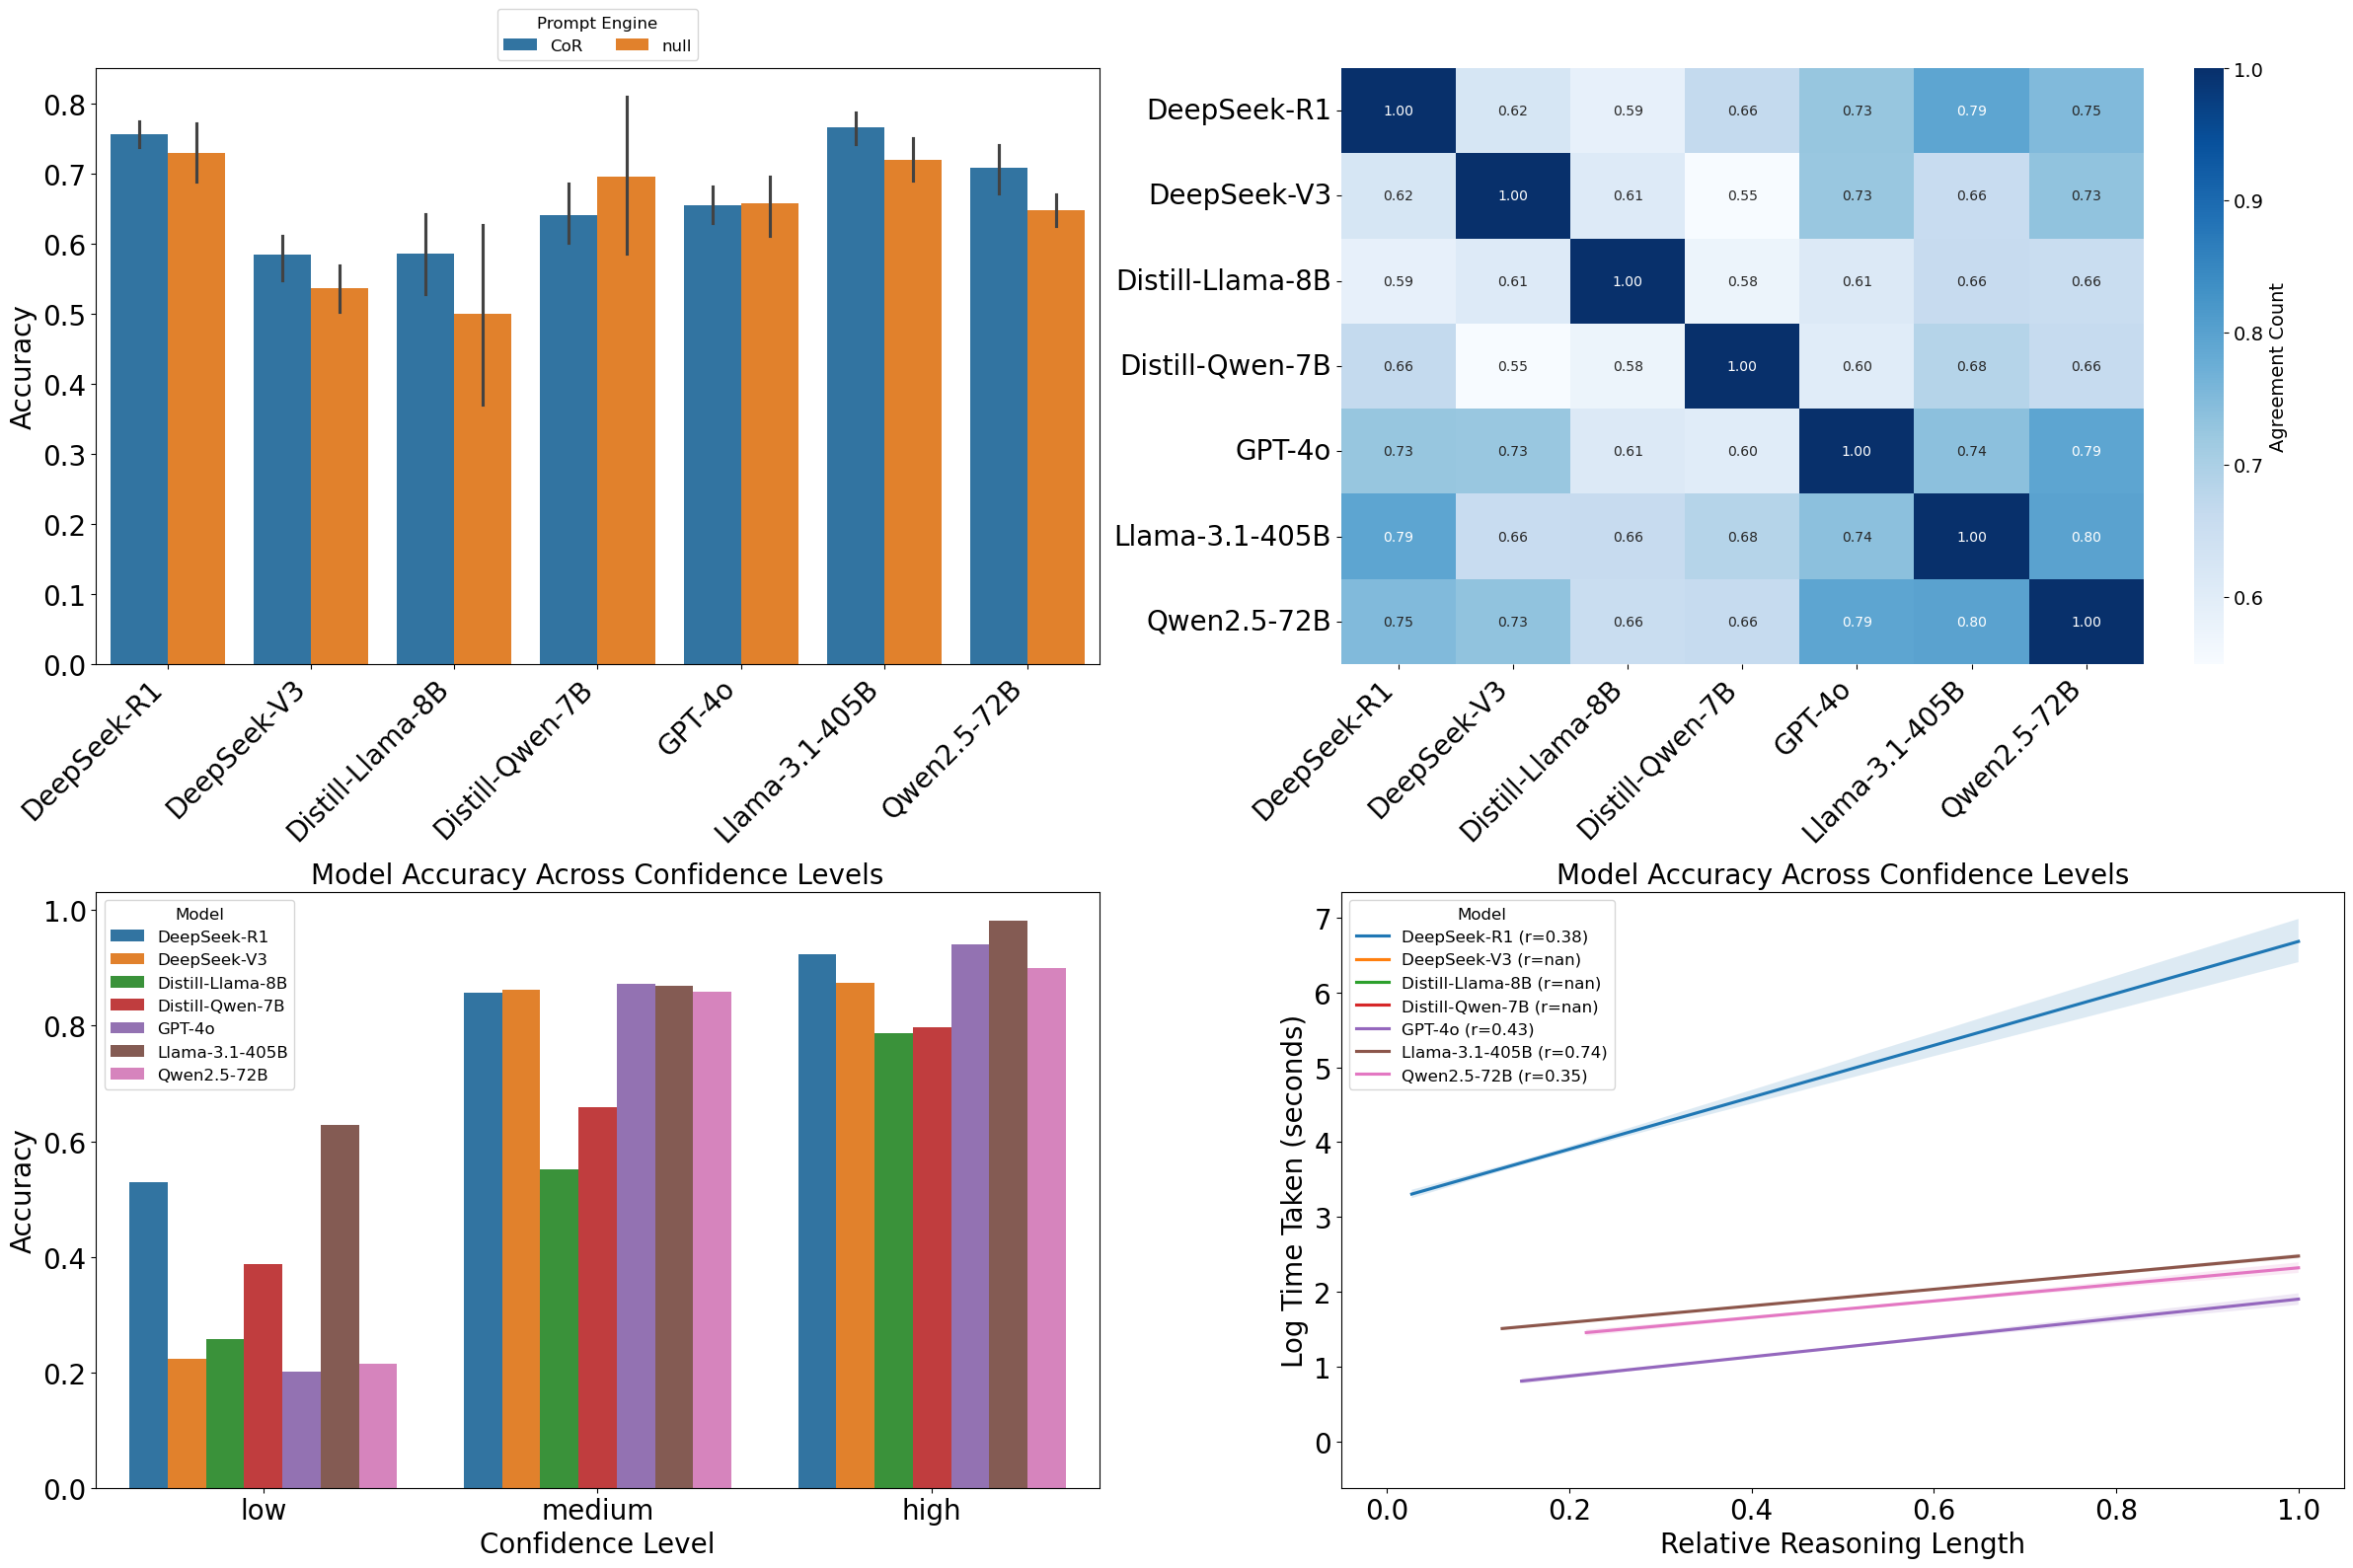

In [17]:
# Create 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 16))
fig.subplots_adjust(wspace=0.2,  # space between columns
                    hspace=0.6)  # space between rows

# Define a consistent palette for models (using models from acc_df as an example)
models = sorted(acc_df['model'].unique())
palette = sns.color_palette("tab10", n_colors=len(models))
color_map = dict(zip(models, palette))

## Subplot 1: Violin & Strip Plot
ax1.tick_params(axis='both', which='major', labelsize=20)
model_order = sorted(acc_df['model'].unique())

sns.barplot(
    data=acc_df,
    x="model",
    y="accuracy",
    hue="engine",
    estimator=np.mean,
    errorbar=("ci", 95),
    order=model_order, ax=ax1
)

ax1.set_ylabel('Accuracy', fontsize=20)
ax1.set_xlabel("")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='Prompt Engine', bbox_to_anchor=(0.5, 1), loc='lower center', ncol=2, fontsize=12, title_fontsize=12)

## Subplot 2: Heatmap
ax2.tick_params(axis='both', which='major', labelsize=20)
heatmap = sns.heatmap(agreement_matrix, 
            annot=True, fmt=".2f",
            cmap='Blues', 
            mask=agreement_matrix.isnull(),
            cbar_kws={'label': 'Agreement Count'}, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
# Now adjust the colorbar fonts
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)                  # Font size for colorbar ticks
cbar.set_label("Agreement Count", fontsize=14)     # Font size for colorbar label

## Subplot 3: Barplot with consistent colors
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.barplot(x='confidence_level', 
            y='correct',
            hue='model',
            data=accuracy_df,
            ax=ax3,
            palette=color_map)  # Use the same color mapping
ax3.set_title('Model Accuracy Across Confidence Levels', fontsize=20)
ax3.set_ylabel('Accuracy', fontsize=20)
ax3.set_xlabel('Confidence Level', fontsize=20)
ax3.legend(title='Model', bbox_to_anchor=(0, 1), loc='upper left', fontsize=12, title_fontsize=12)

## Subplot 4: Regression lines with consistent colors
ax4.tick_params(axis='both', which='major', labelsize=20)
for model in models:
    sub_df = res[res['model'] == model]
    corr = sub_df['relative_reasoning_length'].corr(sub_df['log_time'])
    label = f"{model} (r={corr:.2f})"
    sns.regplot(data=sub_df,
                x="relative_reasoning_length",
                y="log_time",
                ci=95,
                scatter_kws={'alpha': 0},
                line_kws={'label': label},
                color=color_map[model],
                ax=ax4)
ax4.set_title('Model Accuracy Across Confidence Levels', fontsize=20)
ax4.set_xlabel("Relative Reasoning Length", fontsize=20)
ax4.set_ylabel("Log Time Taken (seconds)", fontsize=20)
ax4.legend(title="Model", bbox_to_anchor=(0, 1), loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.savefig('/Users/linxy29/Documents/Files/other collaboration/benchmark/f2_PubMedQA.pdf')
plt.show()